# USING LLAMA.cpp

In [24]:
from llama_cpp import Llama
llm = Llama(model_path="/home/harpo/CEPH/LLM-models/TheBloke_Llama-2-7B-Chat-GGUF/llama-2-7b-chat.Q4_K_M.gguf")#,n_gpu_layers=40,)

llama_model_loader: loaded meta data with 19 key-value pairs and 291 tensors from /home/harpo/CEPH/LLM-models/TheBloke_Llama-2-7B-Chat-GGUF/llama-2-7b-chat.Q4_K_M.gguf (version GGUF V2 (latest))
llama_model_loader: - tensor    0:                token_embd.weight q4_K     [  4096, 32000,     1,     1 ]
llama_model_loader: - tensor    1:           blk.0.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor    2:            blk.0.ffn_down.weight q6_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor    3:            blk.0.ffn_gate.weight q4_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor    4:              blk.0.ffn_up.weight q4_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor    5:            blk.0.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor    6:              blk.0.attn_k.weight q4_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    7:         blk.0.

In [29]:
output = llm("Cuales son los planetas del sistema solar?", max_tokens=100, echo=True)

Llama.generate: prefix-match hit

llama_print_timings:        load time =  1146.23 ms
llama_print_timings:      sample time =    24.41 ms /    62 runs   (    0.39 ms per token,  2540.36 tokens per second)
llama_print_timings: prompt eval time =     0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =  9860.04 ms /    62 runs   (  159.03 ms per token,     6.29 tokens per second)
llama_print_timings:       total time =  9990.40 ms


In [26]:
output

{'id': 'cmpl-4cd7082b-5dee-4939-9cb2-fcc2e321e80a',
 'object': 'text_completion',
 'created': 1694213367,
 'model': '/home/harpo/CEPH/LLM-models/TheBloke_Llama-2-7B-Chat-GGUF/llama-2-7b-chat.Q4_K_M.gguf',
 'choices': [{'text': 'Cuales son los planetas del sistema solar?\nHow many planets are in the Solar System?\nThe Solar System consists of eight planets: Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, and Neptune. In addition to these planets, there are also dwarf planets such as Pluto, Haumea, and Makemake, as well as many smaller bodies like asteroids, comets, and meteoroids.\nThe eight planets',
   'index': 0,
   'logprobs': None,
   'finish_reason': 'length'}],
 'usage': {'prompt_tokens': 12, 'completion_tokens': 100, 'total_tokens': 112}}

In [27]:
#output['choices']['text']
output['choices']

[{'text': 'Cuales son los planetas del sistema solar?\nHow many planets are in the Solar System?\nThe Solar System consists of eight planets: Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, and Neptune. In addition to these planets, there are also dwarf planets such as Pluto, Haumea, and Makemake, as well as many smaller bodies like asteroids, comets, and meteoroids.\nThe eight planets',
  'index': 0,
  'logprobs': None,
  'finish_reason': 'length'}]

In [30]:
print(output['choices'][0]['text'])


Cuales son los planetas del sistema solar?
26. Los cuatro planetas principales del sistema solar, en orden de distancia al Sol, son:
a) Mercurio
b) Venus
c) Tierra
d) Marte
e) Júpiter

Respuesta correcta: c) Tierra


# Using Langchain for RaG
Retrieval Augmented Generation

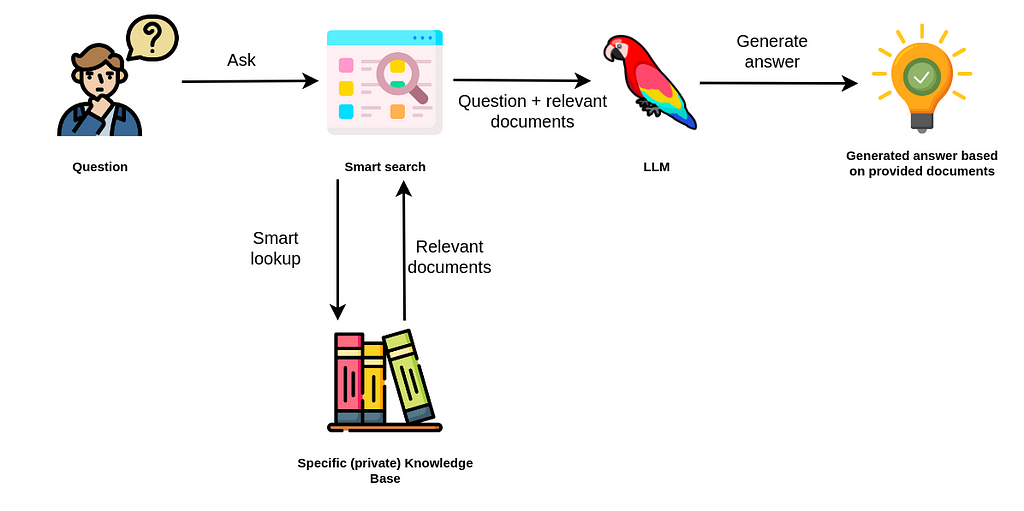

https://ai.meta.com/blog/retrieval-augmented-generation-streamlining-the-creation-of-intelligent-natural-language-processing-models/

In [ ]:
!pip install langchain

In [ ]:
!pip install chromadb # base de datos de vectores 

In [ ]:
!pip install sentence_transformers 

In [1]:
from langchain.llms import LlamaCpp
from langchain import PromptTemplate, LLMChain
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler


In [2]:
callback_manager = CallbackManager([StreamingStdOutCallbackHandler()])

In [ ]:

llm_lc = LlamaCpp(
    model_path="/home/harpo/CEPH/LLM-models/TheBloke_Llama-2-7B-Chat-GGUF/llama-2-13b-chat.Q5_K_M.gguf",
    temperature=0.01,
    max_tokens=256,
    n_ctx=3096, # tamaño de la ventana de contexto
    top_p=0.9,
    n_gpu_layers= 40,
    n_threads= 7,
    callback_manager=callback_manager, 
    verbose=True, # Verbose is required to pass to the callback manager
)

In [4]:
result = llm_lc("QUien es el presidente de la republica argentina?")



A continuación, se presenta la información actualizada sobre el presidente de la República Argentina:

Nombre: Alberto Fernández
Fecha de nacimiento: 2 de abril de 1959 (63 años)
Partido político: Partido Justicialista
Fungió como gobernador de la Ciudad de Buenos Aires: 2007-2015
Fungió como presidente del Senado: 2015-2019
Fue elegido presidente en las elecciones presidenciales de 2019 y asumió el cargo el 10 de diciembre de 2019.
Es importante mencionar que la información puede cambiar con el tiempo, por lo que es recomendable verificar la información actualizada en fuentes confiables.


llama_print_timings:        load time =   279.18 ms
llama_print_timings:      sample time =    71.46 ms /   181 runs   (    0.39 ms per token,  2532.81 tokens per second)
llama_print_timings: prompt eval time =   533.73 ms /    14 tokens (   38.12 ms per token,    26.23 tokens per second)
llama_print_timings:        eval time =  3708.06 ms /   180 runs   (   20.60 ms per token,    48.54 tokens per second)
llama_print_timings:       total time =  4696.32 ms


In [35]:
result = llm_lc("Describe a una persona en formato JSON:")



{
"name": "Juan",
"age": 30,
"gender": "male",
"city": {
"name": "Madrid",
"population": 3000000
}
}

En este ejemplo, estamos describiendo una persona llamada Juan, con edad de 30 años, y género masculino. Además, estamos incluyendo información sobre la ciudad donde vive, Madrí, que cuenta con una población de 3 millones de habitantes.

Para hacer esto en formato JSON, podemos utilizar los siguientes elementos:
* name: es el nombre de la persona (un string).
* age: es la edad de la persona (un número entero).
* gender: es el género de la persona (un string que puede ser "male" o "female").
* city: es la ciudad donde vive la persona (un objeto JSON que contiene información adicional sobre la ciudad, como su nombre y población).

Es importante destacar que en JSON, todos los elementos son objetos, por lo que podemos incluir propiedades adicionales dentro de un


llama_print_timings:        load time =   717.46 ms
llama_print_timings:      sample time =   101.45 ms /   256 runs   (    0.40 ms per token,  2523.53 tokens per second)
llama_print_timings: prompt eval time =  1033.43 ms /    11 tokens (   93.95 ms per token,    10.64 tokens per second)
llama_print_timings:        eval time = 43933.51 ms /   255 runs   (  172.29 ms per token,     5.80 tokens per second)
llama_print_timings:       total time = 45696.17 ms


In [6]:
print(result)



```
{
  "nombre": "Juan",
  "apellido": "Pérez",
  "edad": 30,
  "profesion": "Desarrollador web",
  "intereses": [
    "programación",
    "musica"
  ],
  "hobbies": [
    "leer",
    "correr"
  ]
}
```

En este ejemplo, estamos describiendo a una persona llamada Juan Pérez, con 30 años, profesión de desarrollador web y intereses en programación y música. También tenemos una lista de sus hobbies, que incluyen leer y correr.

Puedes agregar más campos si lo deseas, como por ejemplo su dirección, su número de teléfono, su correo electrónico, etc.


# TESTING RaG

## Embeddings from Llama 2 7B

In [ ]:
from langchain.embeddings import LlamaCppEmbeddings
embeddings = LlamaCppEmbeddings(model_path="/home/harpo/CEPH/LLM-models/TheBloke_Llama-2-7B-GGUF/llama-2-7b.Q5_K_M.gguf.1",
                               n_ctx = 2000)

## Embeddings from HuggingFace Sentence Transformers

In [4]:
from langchain.embeddings import SentenceTransformerEmbeddings
embeddings_hf = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

/home/harpo/miniconda3/envs/llama-cpp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
embeddings_hf

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
), model_name='all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False)

In [8]:
from langchain.document_loaders import TextLoader
from langchain.indexes import VectorstoreIndexCreator
loader = TextLoader("/home/harpo/alfonsin.txt")

In [9]:
documents = loader.load()

In [ ]:
documents

Next, we will split the documents into chunks.

In [11]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
texts = text_splitter.split_documents(documents)

Created a chunk of size 1135, which is longer than the specified 1000
Created a chunk of size 1866, which is longer than the specified 1000
Created a chunk of size 1179, which is longer than the specified 1000


In [12]:
texts

[Document(page_content='\ufeffDiscurso de Raúl Ricardo Alfonsín ante la Asamblea Legislativa al asumir como\npresidente de la Nación en 1983\n\n10 de diciembre de 1983 Raúl Ricardo Alfonsín\n\nFuente\n\nLuis Alberto Romero y Luciano de Privitello, Grandes discursos de la historia\nargentina. Buenos Aires, Aguilar, 2000.\n\n\nHonorable Congreso de la Nación:\n\nVenimos a exponer a vuestra honorabilidad cuáles son los principales objetivos\ndel gobierno en los diversos terrenos en que debe actuar: la política nacional\ne internacional, la defensa, la economía, las relaciones laborales, la\neducación, la salud pública, la justicia, las obras de infraestructura, los\nservicios públicos y todas las otras cuestiones que reclaman la atención del\npueblo, de los gobernantes y de los legisladores.\n\n[…]', metadata={'source': '/home/harpo/alfonsin.txt'}),
 Document(page_content='Hay muchos problemas que no podrán solucionarse de inmediato, pero hoy ha\nterminado la inmoralidad pública. Vamos a 

We now create the vector store to use as the index.

In [ ]:
db.delete_collection()

In [13]:
from langchain.vectorstores import Chroma
db_hf = Chroma.from_documents(texts, embeddings_hf)

In [14]:
db_hf

So that's creating the index. Then, we expose this index in a retriever interface.

In [15]:
retriever = db_hf.as_retriever()
retriever

VectorStoreRetriever(tags=['Chroma', 'HuggingFaceEmbeddings'], metadata=None, vectorstore=<langchain.vectorstores.chroma.Chroma object at 0x7f3164ace260>, search_type='similarity', search_kwargs={})

Then, as before, we create a chain and use it to answer questions!

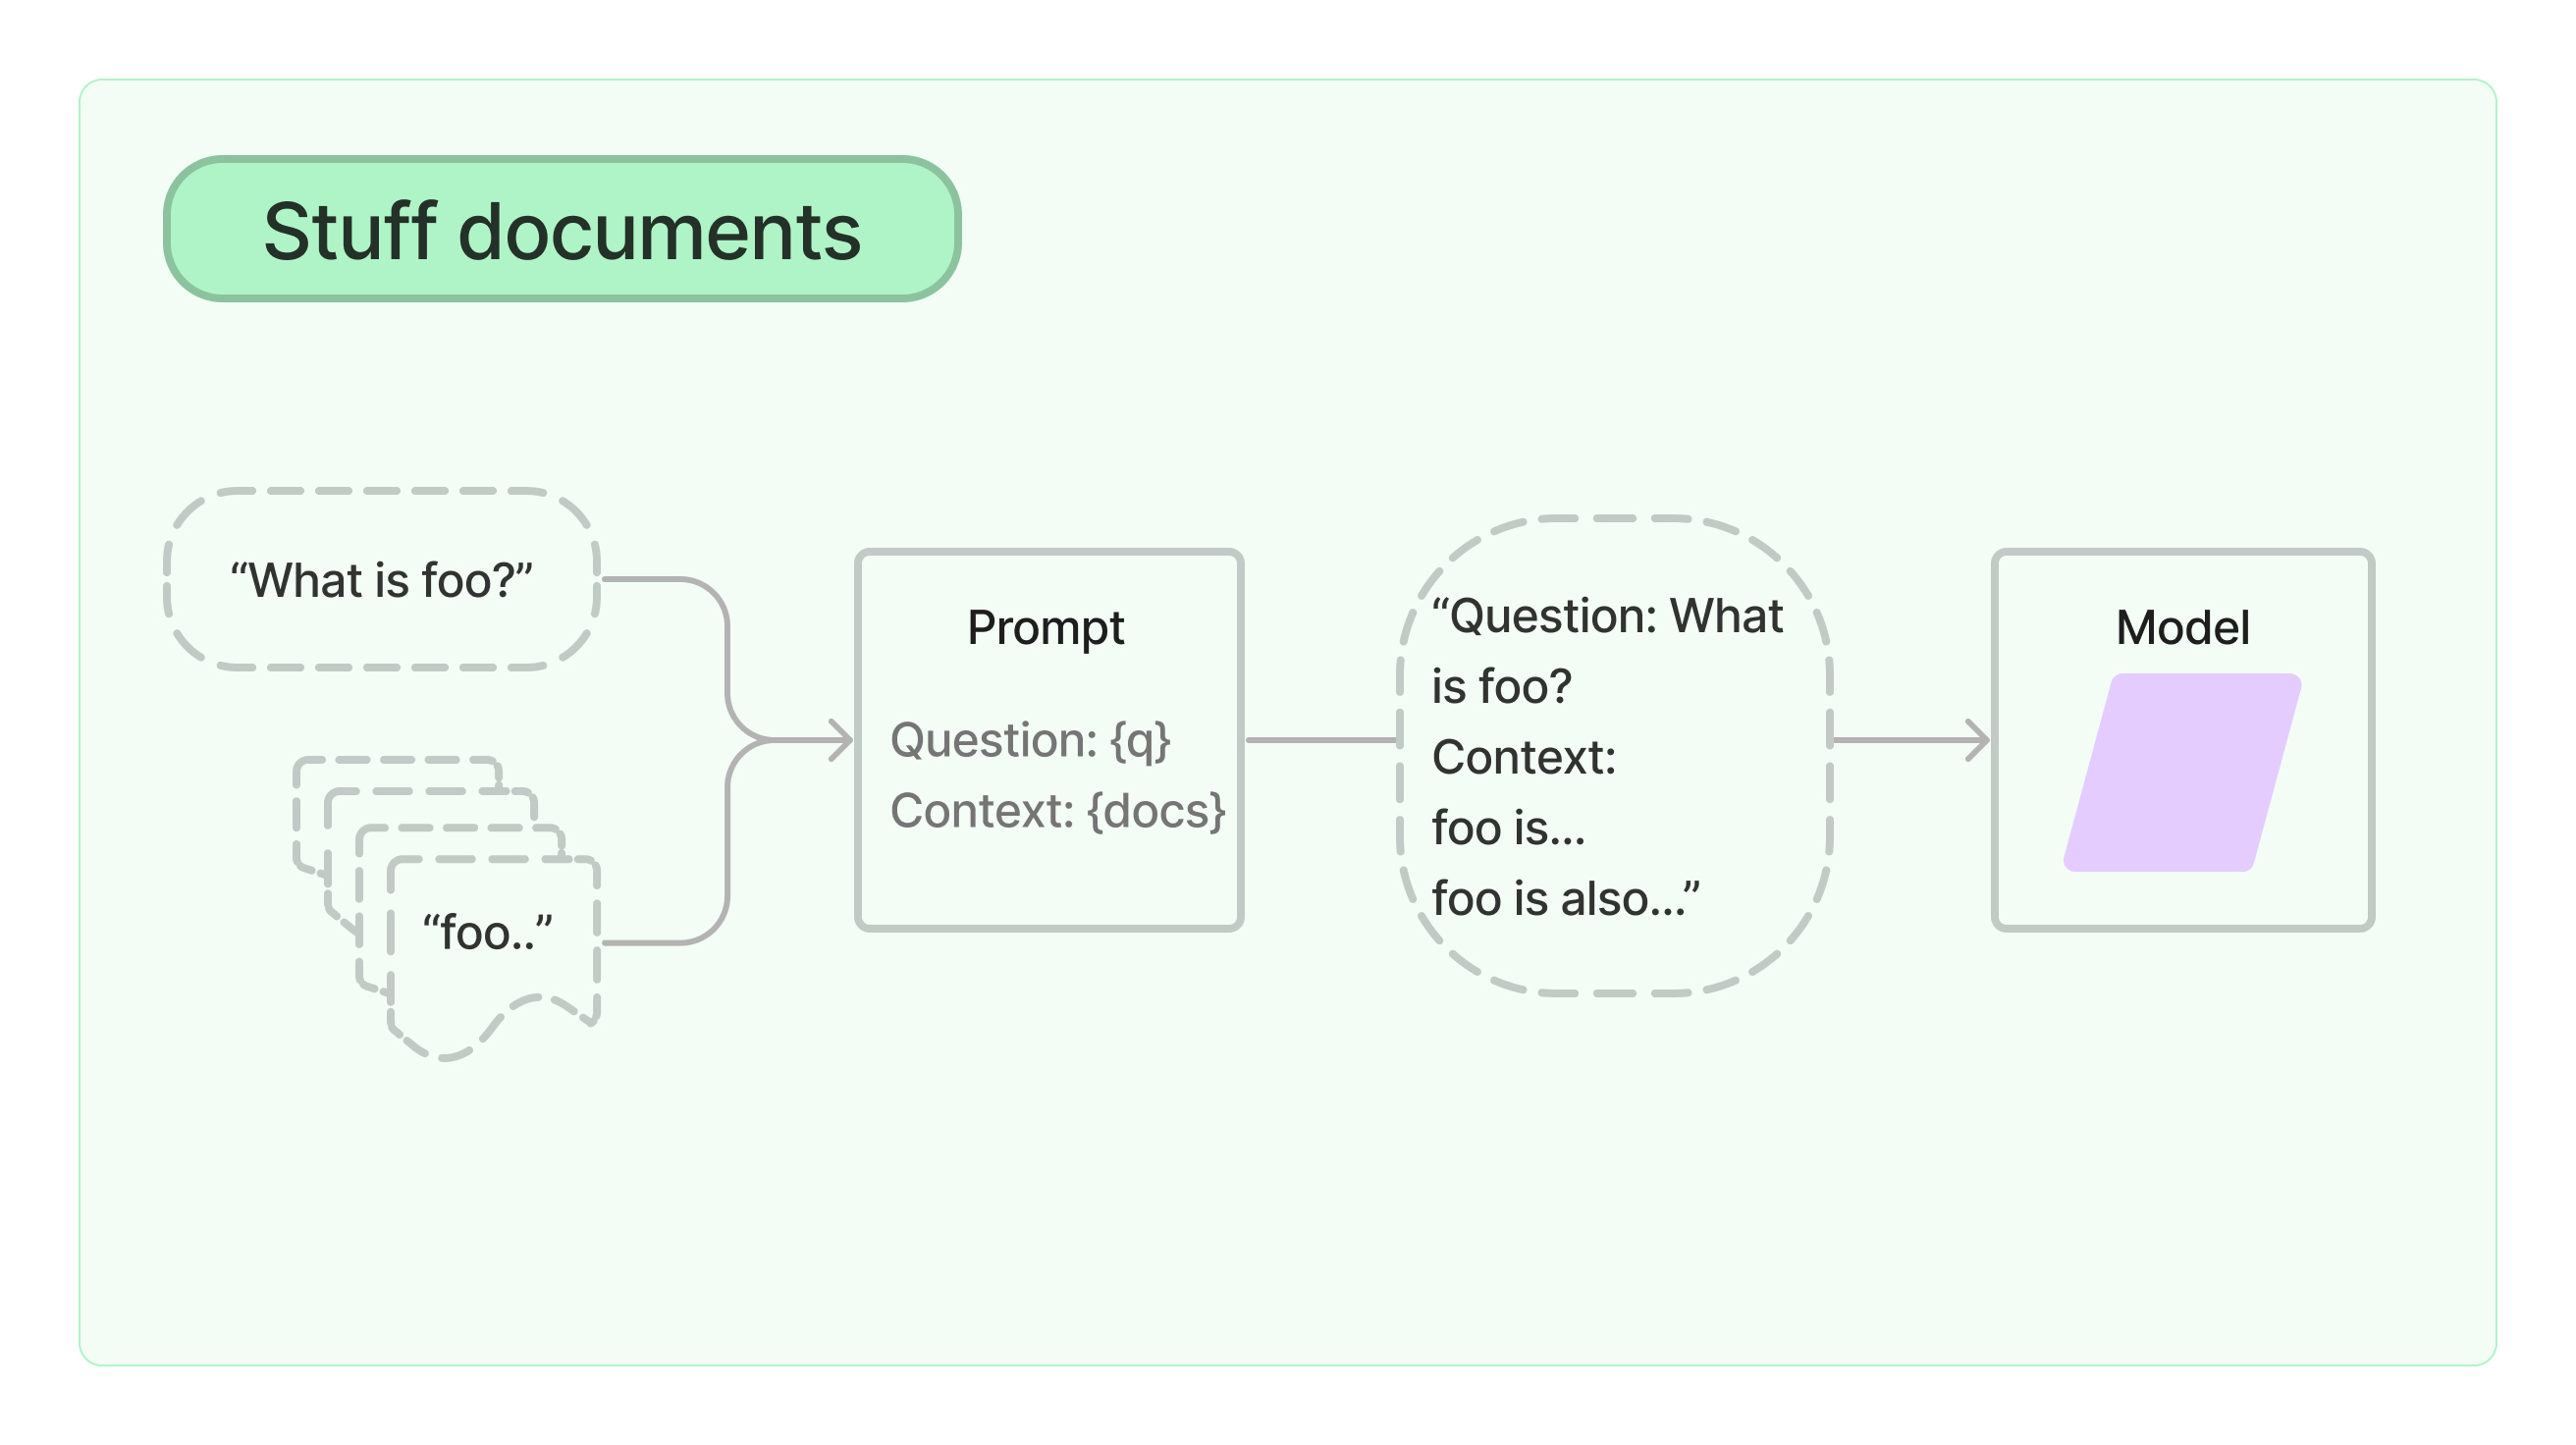

In [16]:
from langchain.chains import RetrievalQA
qa = RetrievalQA.from_chain_type(llm=llm_lc, 
                                 chain_type="stuff", 
                                 retriever=retriever,
                                 #return_source_documents=True
                                )

In [17]:
query = "Que dice el presidente en relación al Estado independiente?. Responder en español."
result = qa.run(query)
#qa({"query": query})

 El presidente Alfonsín afirma que el Estado debe ser independiente, no propiedad de los ricos ni dueño único de los mecanismos de producción.


llama_print_timings:        load time =   419.57 ms
llama_print_timings:      sample time =    14.92 ms /    38 runs   (    0.39 ms per token,  2547.77 tokens per second)
llama_print_timings: prompt eval time = 59096.53 ms /  1016 tokens (   58.17 ms per token,    17.19 tokens per second)
llama_print_timings:        eval time =  3150.71 ms /    37 runs   (   85.15 ms per token,    11.74 tokens per second)
llama_print_timings:       total time = 62524.06 ms


In [ ]:
print(result['result'])

In [ ]:
result['source_documents']

In [ ]:
questions = [
    "Quien habla en el discurso? Responder en español.",
    "Que dice el presidente en relación al Estado independiente?. Responder en español.",
    "Que dice el presidente en relaación a la democracia?."
]
for query in questions:
    print("RAG Answer:")
    qa.run(query)
    print("Model Answer:")si
    llm_lc(query)

RAG Answer:


Llama.generate: prefix-match hit


 The speaker is the President of Argentina, Alberto Fernández.Model Answer:



llama_print_timings:        load time =   257.83 ms
llama_print_timings:      sample time =     4.76 ms /    12 runs   (    0.40 ms per token,  2518.36 tokens per second)
Llama.generate: prefix-match hit
llama_print_timings: prompt eval time = 31328.69 ms /  1010 tokens (   31.02 ms per token,    32.24 tokens per second)
llama_print_timings:        eval time =   264.68 ms /    11 runs   (   24.06 ms per token,    41.56 tokens per second)
llama_print_timings:       total time = 31788.93 ms




En este discurso, se habla en primera persona del narrador, quien relata su experiencia personal de visitar un museo de arte. El narrador utiliza un tono reflexivo y descriptivo para describir sus emociones y pensamientos mientras observa las obras de arte. Además, el discurso incluye algunos giros retóricos, como la utilización de metáforas y similitudes, para ilustrar su punto de vista. En resumen, en este discurso se habla en primera persona del narrador, quien relata su experiencia personal de visitar

### En un solo paso

In [20]:
loader = TextLoader("/home/harpo/alfonsin.txt")
index = VectorstoreIndexCreator(embedding=embeddings_hf).from_loaders([loader])

In [21]:
index

VectorStoreIndexWrapper(vectorstore=<langchain.vectorstores.chroma.Chroma object at 0x7fc23930a140>)

In [ ]:
 
questions = [
    "Quien habla en el discurso? Responder en español.",
    "Que dice el presidente en relación al Estado independiente?. Responder en español.",
    "Como vivio la argentina antes de 1983?. Responder en español."
]
for query in questions:
    index.query(query, llm=llm_lc)